In [1]:
import math as m
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

In [36]:
def cuarto(L,d,alfa):
    x = [0 , L/2 , L/2 , -L/2 , -L/2 , 0]
    y = [0 , L*np.tan(alfa)/2 , L*np.tan(alfa)/2 +d , L*np.tan(alfa)/2 +d , L*np.tan(alfa)/2 , 0]
    return plt.plot(x,y)

def caida_libre(t , x_v , g=9.8 , gam=0 , alfa = np.pi/10 ):
    # x_v = [ x , y , vx , vy]
    dx = x_v[2]
    dy = x_v[3]
    dvx = -gam*x_v[2]
    dvy = -g -gam*x_v[3]
    return np.array([dx,dy,dvx,dvy])

def suelo(t , x_v , g=9.8 , gam=0 , alfa = np.pi/10 ):
    # x_v = [ x , y , vx , vy]
    return x_v[1] - np.tan(alfa)*abs(x_v[0])

def pared_der(t , x_v , g=9.8 , gam=0 , alfa = np.pi/10 ):
    # x_v = [ x , y , vx , vy]
    return x_v[0]-5

def pared_izq(t , x_v , g=9.8 , gam=0 , alfa = np.pi/10 ):
    # x_v = [ x , y , vx , vy]
    return x_v[0]+5

def techo(t , x_v , g=9.8 , gam=0 , alfa = np.pi/10 ):
    # x_v = [ x , y , vx , vy]
    return x_v[1] - 5*np.tan(alfa) -3

def min_no_zero(eventos,epsilon=1e-3):
    eventos = np.concatenate(eventos)
    eventos = np.sort(eventos)
    if eventos[0] <= epsilon:
        indice = 1
    else:
        indice = 0
    return eventos[indice]

Primer reborte: [ 4.60082063  4.62459848 20.22542486 11.65779149]
Segundo reborte: [  5.           4.39260563  20.22542486 -11.85120932]
Tercer reborte: [ -1.11432484   0.36206609 -20.22542486 -14.81383601]
Cuarto reborte: [ -5.           3.0272194  -20.22542486  12.93107623]


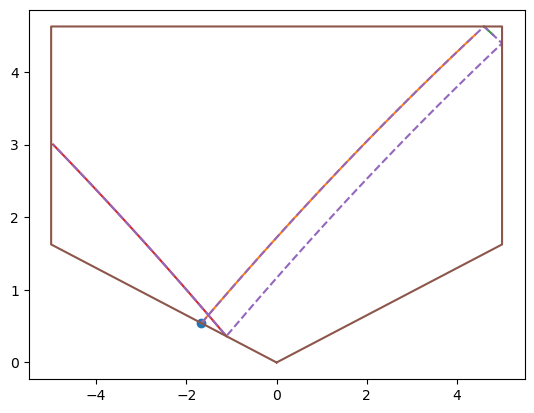

In [64]:
L,d,alfa = 10,3,np.pi/10
vel = 25
ci = [ -L/6 , np.tan(alfa)*L/6 , vel*np.cos(2*alfa) , vel*np.sin(2*alfa)]
plt.plot(ci[0],ci[1],'o')
condiciones = [suelo,pared_der,pared_izq,techo]
x_tot , y_tot = np.array([]) , np.array([])
####
tf = 3
x_v = sp.solve_ivp(caida_libre,(0,tf),ci,dense_output=True,events=condiciones,args=(9.8,0,alfa,))
t_reb = min_no_zero(x_v.t_events)
t_vuelo = np.arange(0,t_reb,0.01)
x , y , vx , vy = x_v.sol(t_vuelo)
x_tot , y_tot = np.concatenate((x_tot,x)) , np.concatenate((y_tot,y))
ci = x_v.sol(t_reb)
print("Primer reborte:",ci)
#
ci[3] = -ci[3]
x_v = sp.solve_ivp(caida_libre,(0,tf),ci,dense_output=True,events=condiciones,args=(9.8,0,alfa,))
t_reb = min_no_zero(x_v.t_events)
t_vuelo = np.arange(0,t_reb,0.01)
x2 , y2 , vx2 , vy2 = x_v.sol(t_vuelo)
x_tot , y_tot = np.concatenate((x_tot,x2)) , np.concatenate((y_tot,y2))
ci = x_v.sol(t_reb)
print("Segundo reborte:",ci)
#
ci[2] = -ci[2]
x_v = sp.solve_ivp(caida_libre,(0,tf),ci,dense_output=True,events=condiciones,args=(9.8,0,alfa,))
t_reb = min_no_zero(x_v.t_events)
t_vuelo = np.arange(0,t_reb,0.01)
x3 , y3 , vx3 , vy3 = x_v.sol(t_vuelo)
x_tot , y_tot = np.concatenate((x_tot,x3)) , np.concatenate((y_tot,y3))
ci = x_v.sol(t_reb)
print("Tercer reborte:",ci)
#
ci[3] = -ci[3]
x_v = sp.solve_ivp(caida_libre,(0,tf),ci,dense_output=True,events=condiciones,args=(9.8,0,alfa,))
t_reb = min_no_zero(x_v.t_events)
t_vuelo = np.arange(0,t_reb,0.01)
x3 , y3 , vx3 , vy3 = x_v.sol(t_vuelo)
x_tot , y_tot = np.concatenate((x_tot,x3)) , np.concatenate((y_tot,y3))
ci = x_v.sol(t_reb)
print("Cuarto reborte:",ci)


plt.plot(x,y)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x_tot,y_tot,'--')
cuarto(L,d,alfa)
plt.show()